# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [1]:
# Import necessary libraries
import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
# Import passengers.csv and set it as a time-series object. Plot the TS
df = pd.read_csv("passengers.csv")
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
df.Month = pd.to_datetime(df.Month, format='%Y-%m-%d')
df.set_index('Month', inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


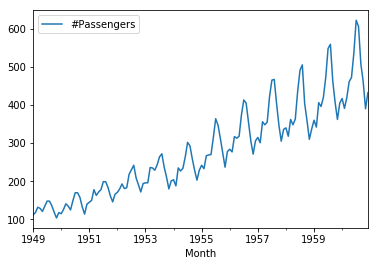

In [4]:
df.plot()

## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [5]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    rolmean = TS.rolling(window = 8, center = False).mean()
    rolstd = TS.rolling(window = 8, center = False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['#Passengers']) # change the passengers column as required 
    
    #Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
    return None

Use your newly created function on the airpassenger data set.

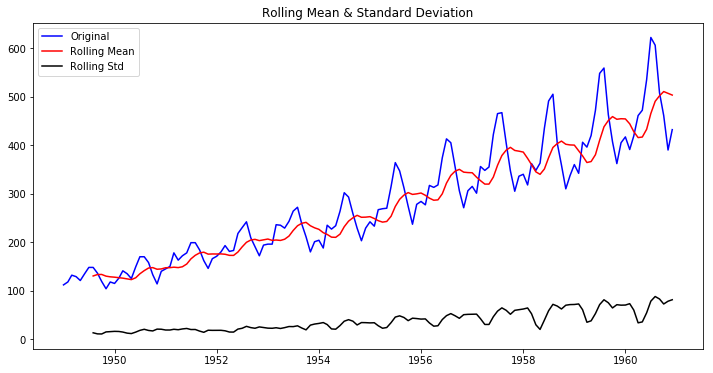

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [6]:
stationarity_check(df)

## Perform a log() and sqrt() transform

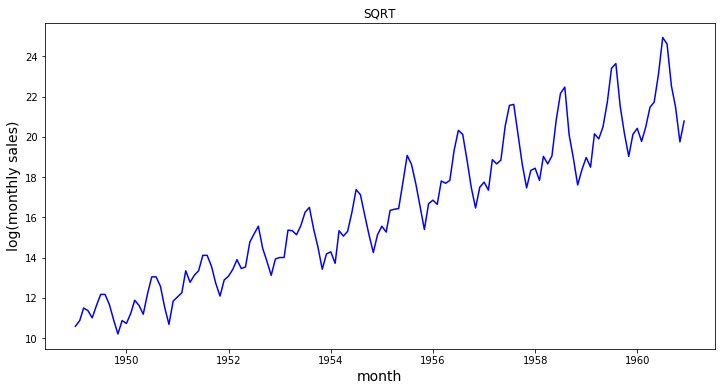

In [12]:
sqrt_df = np.sqrt(df)
fig = plt.figure(figsize=(12,6))
plt.plot(sqrt_df, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.title("SQRT")
plt.show()

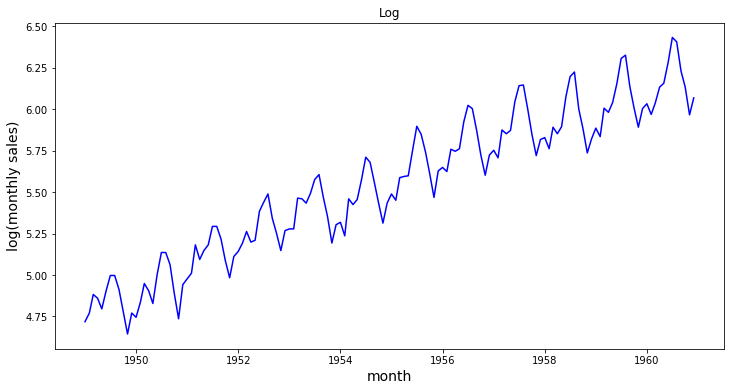

In [13]:
# Log transform timeseries and compare with original to check the effect
log_df = np.log(df)
fig = plt.figure(figsize=(12,6))
plt.plot(log_df, color="blue")
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.title("Log")
plt.show()

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

Create a rolling mean using your log transformed time series, with a time window of 7. Plot the log-transformed time series and the rolling mean together.

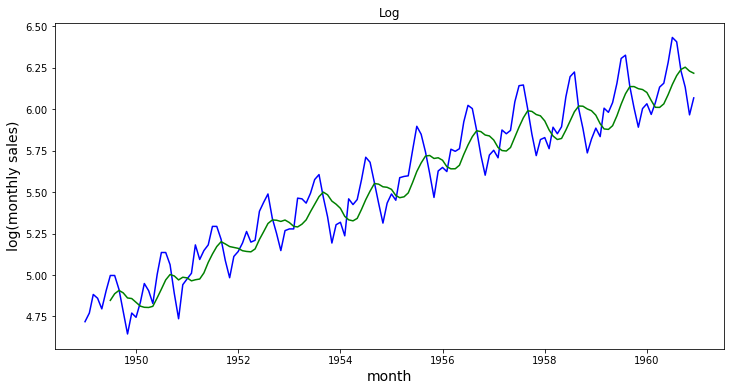

In [21]:
rolmean = log_df.rolling(7).mean()
fig = plt.figure(figsize=(12,6))
plt.plot(log_df, color="blue")
plt.plot(rolmean, color='green')
plt.xlabel("month", fontsize=14)
plt.ylabel("log(monthly sales)", fontsize=14)
plt.title("Log")
plt.show()

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [23]:
noroll = log_df-rolmean
noroll.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404


In [24]:
# Drop the NaN values from timeseries calculated above
noroll.dropna(inplace=True)
noroll.head(15)

,#Passengers
Month,
1949-07-01,0.150059
1949-08-01,0.110242
1949-09-01,0.005404
1949-10-01,-0.113317
1949-11-01,-0.217275
1949-12-01,-0.087394
1950-01-01,-0.090241
1950-02-01,0.024099
1950-03-01,0.143499


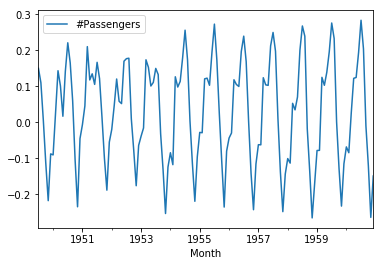

In [25]:
# Plot the result
noroll.plot()

Finally, use your function `check_stationarity` to see if this series is considered stationary!

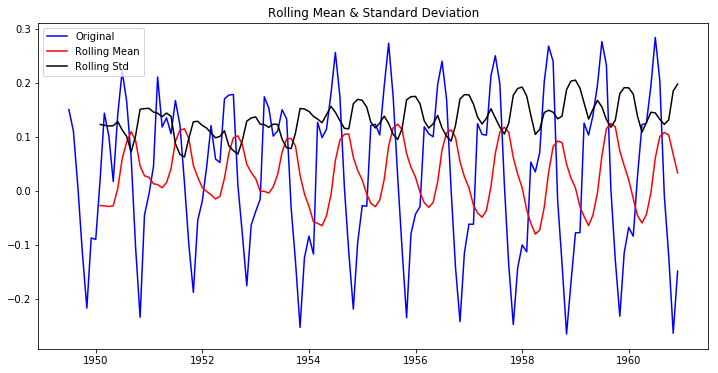

Results of Dickey-Fuller Test:
Test Statistic                  -2.348027
p-value                          0.156946
#Lags Used                      14.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [26]:
stationarity_check(noroll)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


# Your conclusion here
The visuals shows pretty darn good but with just some heteroskedasticity.  DF test is not quite able to reject that it is not stationary though with a pvalue of .15

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

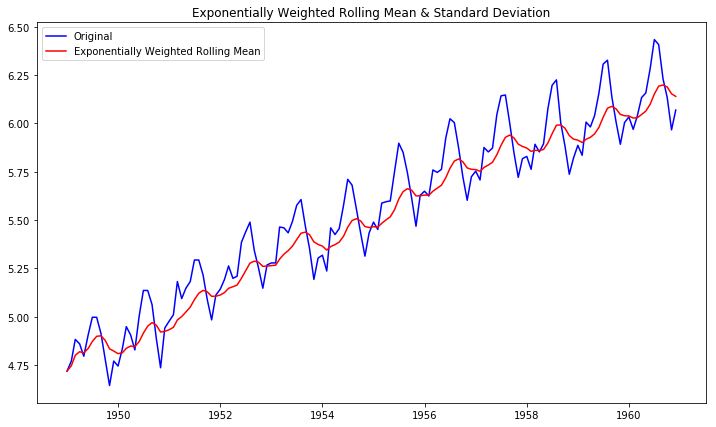

In [27]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = log_df.ewm(halflife = 4).mean()

# Plot the original data with exp weighted average
fig = plt.figure(figsize=(12,7))
orig = plt.plot(log_df, color='blue',label='Original')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')
plt.legend(loc='best')
plt.title('Exponentially Weighted Rolling Mean & Standard Deviation')
plt.show(block=False)

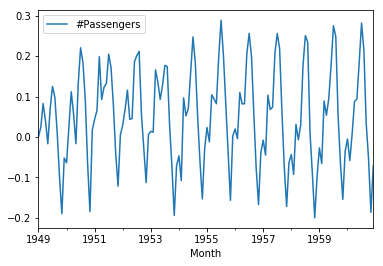

In [29]:
noexproll = log_df - exp_rolmean
noexproll.dropna(inplace=True)
noexproll.plot()

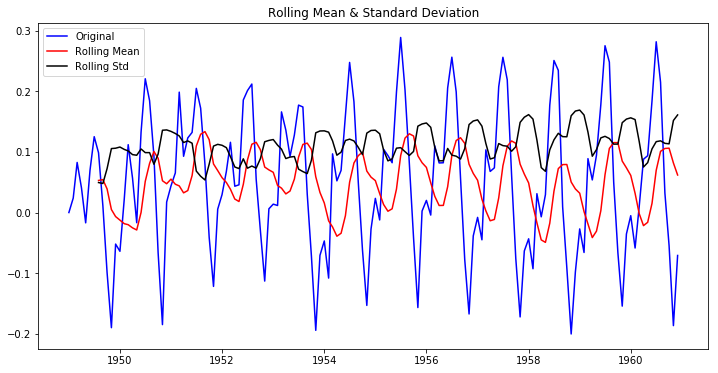

Results of Dickey-Fuller Test:
Test Statistic                  -3.297250
p-value                          0.015002
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [30]:
stationarity_check(noexproll)

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


# Your conclusion here
I didn't think the visual was much different but the DF test passed this time

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [69]:
# difference your data and look at the head

data_diff = noexproll.diff(periods=12)

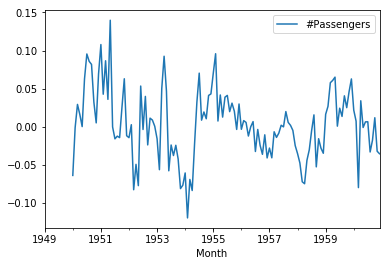

In [70]:
# plot your differenced time series
data_diff.plot()

In [71]:
data_diff.dropna(inplace=True)

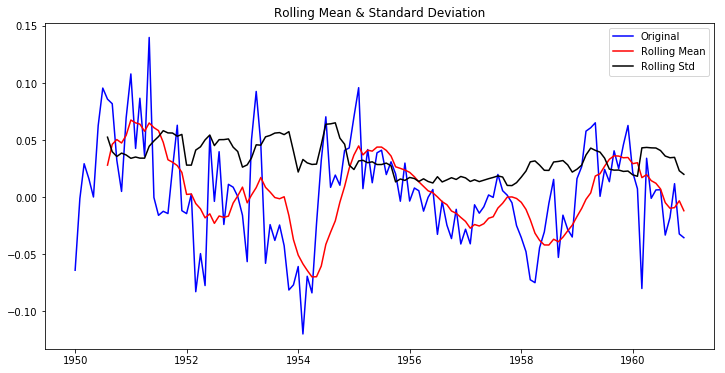

Results of Dickey-Fuller Test:
Test Statistic                  -3.601666
p-value                          0.005729
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [72]:
stationarity_check(data_diff)

### Your conclusion

# Your conclusion here
The plot looks a little strange but the differencing did seem to get rid of the seasonality

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.